In [29]:
#Importowanie bibliotek
import cv2
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model

#Inicjalizacja akceleratora GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
#Załadowanie wytrenowanej sieci do klasyfikacji zdjęć
bird_classifier=load_model('C:/Users/komej/Desktop/birds recognition/v2/bird1.h5')


config='C:/Users/komej/Desktop/birds recognition/rec/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='C:/Users/komej/Desktop/birds recognition/rec/frozen_inference_graph.pb'

#Załadowanie przetrenowanej sieci do wykrywania obiektów i konfiguracja
bird_detection=cv2.dnn_DetectionModel(frozen_model,config)
bird_detection.setInputSize(512,512)
bird_detection.setInputScale(1.0/127.5)
bird_detection.setInputMean((127.5,127.5,127.5))
bird_detection.setInputSwapRB(True)

#Wczytanie dostępnych klas 
classLabels=[]
filename='C:/Users/komej/Desktop/birds recognition/rec/labels.txt'
with open(filename,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

def bird_finder(img_path):
    arr=[]
    #Wczytanie zdjęcia i detekcja obiektów na zdjęciu
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(512,512),interpolation=cv2.INTER_AREA)
    classIndex,confidence,bbox=bird_detection.detect(img,confThreshold=0.2)
    for i in bbox:
        arr.append(i)
    #Zabezpiecznie gdy sieć przewidzi 2 ramki zostanie wybrana ta o większym polu
    sum_list=[]
    for ind,j in enumerate(arr):
        j=sum(j)
        sum_list.append(j)
        temp=sum_list[ind-1]
        temp2=sum_list[ind]
        if temp>temp2:
            boxx=0
        elif temp<temp2:
            boxx=1
        else:
            boxx=0
    
    #Przyciecie zdjęcia do wielkości ramki 
    cords=arr[boxx]
    im=img[cords[1]-30:cords[1]+cords[3]+30,cords[0]-50:cords[0]+cords[2]+50]
    im=cv2.resize(im,(224,224),interpolation=cv2.INTER_AREA)
    #plt.imshow(im)
    return im

img=bird_finder('C:/Users/komej/Desktop/birds recognition/rec/test7.jpg')
def model_prediction(img):
    #img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)/255
    img=img/255
    plt.imshow(img)
    img=np.expand_dims(img,axis=0)
    prediction=bird_classifier.predict(img)
    arr=prediction.tolist()
    arr_p=[]
    for l in arr:
        arr_p.append(l)
    m=np.argmax(arr_p)
    df=pd.read_csv('C:/Users/komej/Desktop/birds recognition/v2/class_dict.csv')
    print('Nazwa gatunku:',df['class'][m])
    print('Index:',m)
    print('Dokładność',prediction[0,m])

Nazwa gatunku: COUCHS KINGBIRD
Index: 86
Dokładność 0.6247411


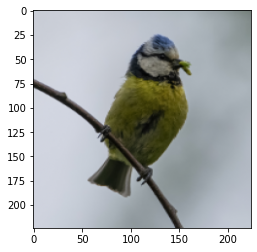

In [30]:
model_prediction(img)